<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Period-Tracker/RFR_next_menses_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, r2_score

In [77]:
df = pd.read_csv('PeriodData.csv')
np.random.seed(0)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [79]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,TotalFertilityFormula,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,MensesScoreDaySeven,MensesScoreDayEight,MensesScoreDayNine,MensesScoreDayTen,MensesScoreDay11,MensesScoreDay12,MensesScoreDay13,MensesScoreDay14,MensesScoreDay15,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,PhasesBleeding,IntercourseDuringUnusBleed,Age,AgeM,Maristatus,MaristatusM,Yearsmarried,Wedding,Religion,ReligionM,Ethnicity,EthnicityM,Schoolyears,SchoolyearsM,OccupationM,IncomeM,Height,Weight,Reprocate,Numberpreg,Livingkids,Miscarriages,Abortions,Medvits,Medvitexplain,Gynosurgeries,LivingkidsM,Boys,Girls,MedvitsM,MedvitexplainM,Urosurgeries,Breastfeeding,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,5,0,2,9,15,5,4.49,3,3,2,1,1,,,,,,,,,,,10,9.04,5,1,0,,,36,39,0,0,10,,0,0,0,0,8,8,3,5,63,120,0,3,3,0,0,0,,,,,,0,,,0,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,2,1,1,,,,,,,,,,,10,,6,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,1,0,2,5,13,5,,3,3,2,1,1,,,,,,,,,,,10,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,3,2,1,,,,,,,,,,,12,,3,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,4,0,2,8,14,5,,3,3,2,2,1,,,,,,,,,,,11,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [80]:
columns = df.columns
print(columns)

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [81]:
df = df[['ClientID', 'CycleNumber', 'LengthofCycle', 'MeanCycleLength',
        'LengthofMenses', 'MeanMensesLength']]

In [82]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,5,4.49
1,nfp8122,2,27,,5,
2,nfp8122,3,29,,5,
3,nfp8122,4,27,,5,
4,nfp8122,5,28,,5,


In [83]:
df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')

<ipython-input-83-d0140114022a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
<ipython-input-83-d0140114022a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')


In [84]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,5,4.49
1,nfp8122,2,27,27.33,5,4.49
2,nfp8122,3,29,27.33,5,4.49
3,nfp8122,4,27,27.33,5,4.49
4,nfp8122,5,28,27.33,5,4.49


In [85]:
df =df.replace(' ', np.nan)

In [86]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,5,4.49
1,nfp8122,2,27,27.33,5,4.49
2,nfp8122,3,29,27.33,5,4.49
3,nfp8122,4,27,27.33,5,4.49
4,nfp8122,5,28,27.33,5,4.49
5,nfp8122,6,26,27.33,5,4.49
6,nfp8122,7,29,27.33,5,4.49
7,nfp8122,8,24,27.33,4,4.49
8,nfp8122,9,28,27.33,6,4.49
9,nfp8122,10,28,27.33,5,4.49


In [87]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,5,4.49
1,nfp8122,2,27,27.33,5,4.49
2,nfp8122,3,29,27.33,5,4.49
3,nfp8122,4,27,27.33,5,4.49
4,nfp8122,5,28,27.33,5,4.49
5,nfp8122,6,26,27.33,5,4.49
6,nfp8122,7,29,27.33,5,4.49
7,nfp8122,8,24,27.33,4,4.49
8,nfp8122,9,28,27.33,6,4.49
9,nfp8122,10,28,27.33,5,4.49


In [88]:
columns_to_convert = ['MeanCycleLength',	'LengthofMenses',	'MeanMensesLength']
for col in columns_to_convert:
               df[col] = pd.to_numeric(df[col], errors='coerce')

In [89]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID              0
CycleNumber           0
LengthofCycle         0
MeanCycleLength     256
LengthofMenses        4
MeanMensesLength    268
dtype: int64


In [90]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(df)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,5.0,4.49
1,nfp8122,2,27,27.33,5.0,4.49
2,nfp8122,3,29,27.33,5.0,4.49
3,nfp8122,4,27,27.33,5.0,4.49
4,nfp8122,5,28,27.33,5.0,4.49
5,nfp8122,6,26,27.33,5.0,4.49
6,nfp8122,7,29,27.33,5.0,4.49
7,nfp8122,8,24,27.33,4.0,4.49
8,nfp8122,9,28,27.33,6.0,4.49
9,nfp8122,10,28,27.33,5.0,4.49


In [91]:
def fill_missing_menses_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanMensesLength' is missing (NaN), calculate the mean of 'LengthofMenses'
        if group['MeanMensesLength'].isnull().any():
            mean_menses_length = group['LengthofMenses'].mean()

            # Fill missing MeanMensesLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanMensesLength'] = df.loc[df['ClientID'] == client_id, 'MeanMensesLength'].fillna(mean_menses_length)

    return df

In [92]:
df = fill_missing_menses_length(df)

In [93]:
def fill_missing_cycle_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanCycleLength' is missing (NaN), calculate the mean of 'LengthofCycle'
        if group['MeanCycleLength'].isnull().any():
            mean_cycle_length = group['LengthofCycle'].mean()

            # Fill missing MeanCycleLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanCycleLength'] = df.loc[df['ClientID'] == client_id, 'MeanCycleLength'].fillna(mean_cycle_length)

    return df

In [94]:
df = fill_missing_cycle_length(df)

In [95]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID            0
CycleNumber         0
LengthofCycle       0
MeanCycleLength     0
LengthofMenses      4
MeanMensesLength    0
dtype: int64


In [96]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

     ClientID  CycleNumber  LengthofCycle  MeanCycleLength  LengthofMenses  \
1107  nfp8237           18             25            25.85             NaN   
1298  nfp8276           10             27            26.58             NaN   
1340  nfp8282           14             29            32.07             NaN   
1664  nfp8334           11             24            29.63             NaN   

      MeanMensesLength  
1107              5.84  
1298              5.73  
1340              5.64  
1664              6.60  


In [97]:
df = df[df['ClientID'] != 'nfp8085']

In [98]:
df = df[df['ClientID'] != 'nfp8226' ]

In [99]:
df.loc[:, 'LengthofMenses'] = df.groupby('ClientID')['LengthofMenses'].transform(lambda x: x.fillna(x.mean()))

In [100]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ClientID, CycleNumber, LengthofCycle, MeanCycleLength, LengthofMenses, MeanMensesLength]
Index: []


In [101]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 15 duplicate rows in the data set.
The duplicate rows were removed.


In [102]:
df = df.drop(columns=['ClientID'])

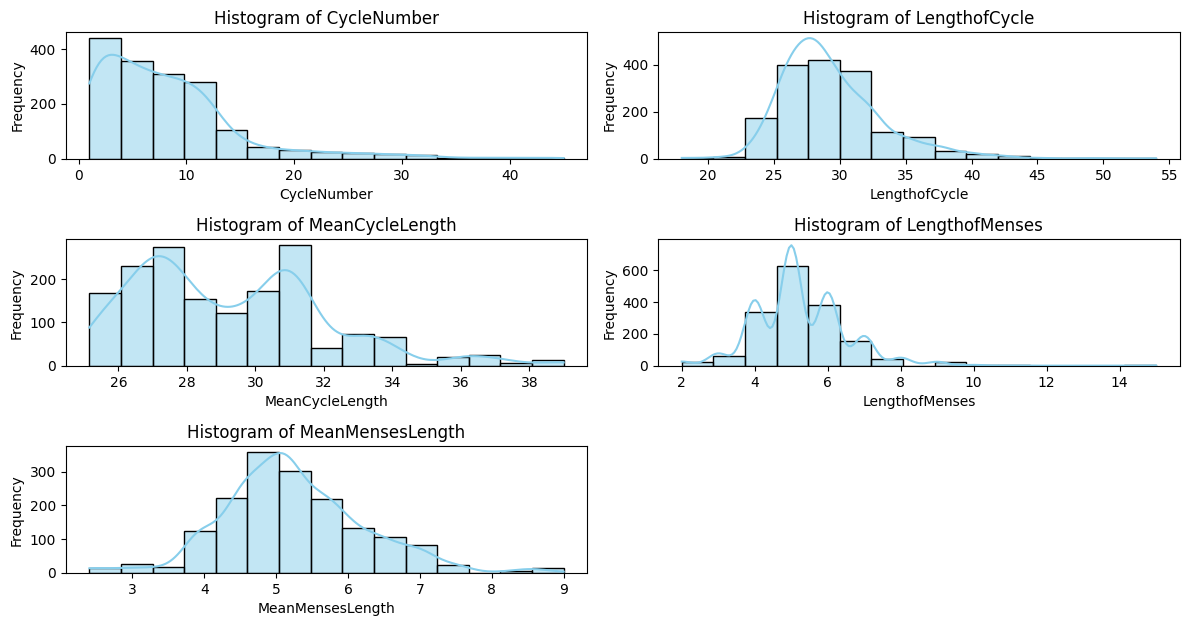

In [103]:
# Plot histograms
columns_to_plot = ['CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'LengthofMenses',
       'MeanMensesLength']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

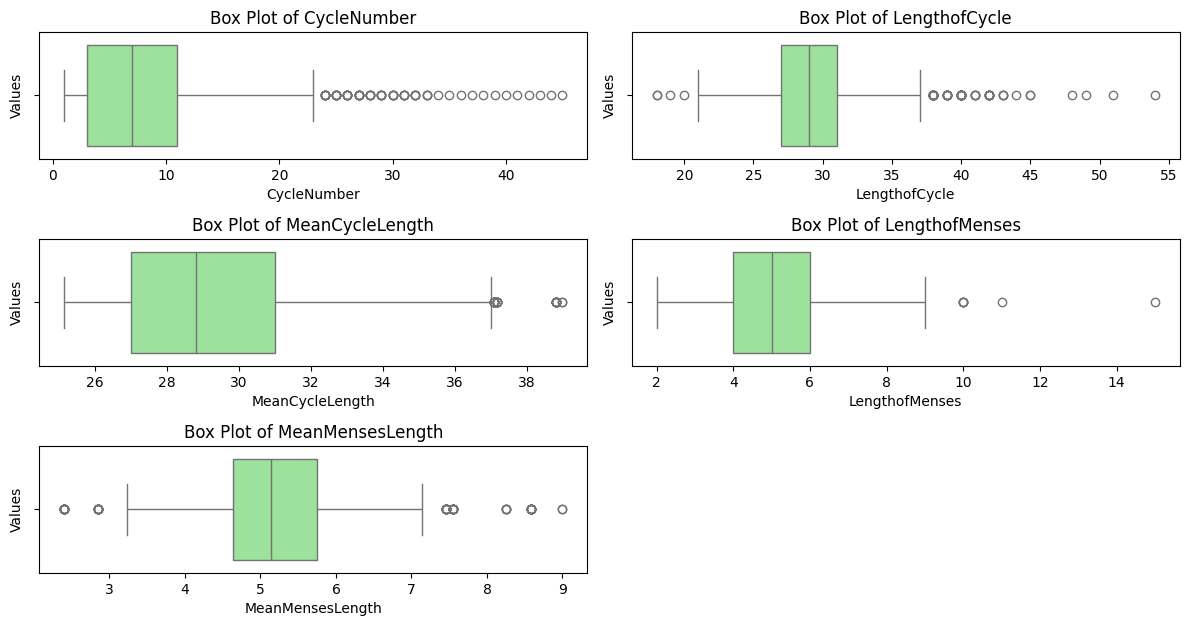

In [104]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

In [105]:
X = df.drop(columns=['LengthofCycle'])  # All columns except 'y'
y = df['LengthofCycle']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
# Predicting on test data
y_pred = rf_model.predict(X_test)

In [109]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.181462316498317
R-squared: 0.45098131575082545


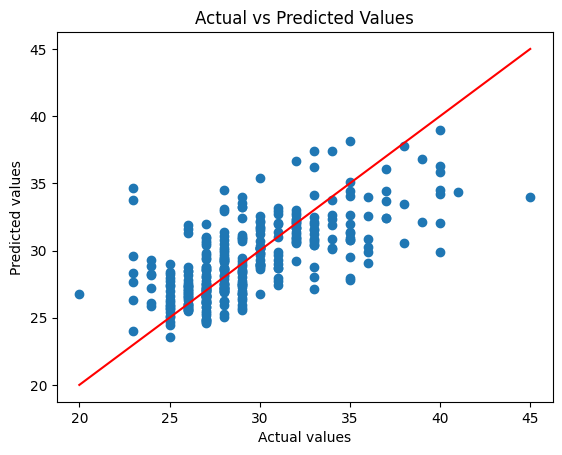

In [110]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best}")
print(f"Optimized R-squared: {r2_best}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Optimized Mean Squared Error: 7.437280255147826
Optimized R-squared: 0.5009198035613216


In [113]:
import joblib

# Save the best model found by GridSearchCV
joblib.dump(best_rf_model, 'lengthcalculator.pkl')

print("Model saved successfully!")

Model saved successfully!
